# VAR/SVAR 模型相關程式

### 簡要Summary

* 編號：v5i1-unif92746

1. 5個變數

2. 認定條件是：同期的房價不會影響同期的sentiment

3. 用uniform(-10,10) seed 92746

### 環境設定

In [2]:
# 設定路徑
Path = "/Users/Andy 1/Google 雲端硬碟 (r08323004@g.ntu.edu.tw)/0 Semesters/Thesis/6_VAR_model/R"
setwd(Path)
source("code/VAR_functions.R")           # 讀取 VARsource.R 檔

inv_tol = 1e-20 #求反矩陣時做數值運算允許的最小誤差(避免singular matrix)
#inv_tol = 1e-22

In [3]:
options(warn=-1)    # 關掉warning
#options(warn=0)
options(scipen=999) #不要科學記號

### 讀資料

In [4]:
###### 讀取資料 ######
file = "data/df.csv"
data = read.csv(file = file, header = TRUE)
data = na.omit(data)
# 5-variable model
By <- data %>% select(interest_rate, permit, loan, Sentiment, hp) %>% as.matrix

### 模型設定

In [5]:
#----- 模型設定 -----#
VAR.P = 2                       # 最大的落後項數
CONST = TRUE                    # 是否有常數項
Y     = VAR.Y(By, VAR.P)        # 設定 Y
X     = VAR.X(By, VAR.P)        # 設定 X

## Reduced Form VAR

In [6]:
###### 參數估計 ######
(Coef.OLS    = VAR.OLS(Y, X, CONST)                  )
(Sigma.OLS   = VAR.Sigma.OLS(Y, X, Coef.OLS, CONST)  )
(Sigma.MLE   = VAR.Sigma.MLE(Y, X, Coef.OLS, CONST))

0.739412234,0.0000263549677,0.0000016481157,12.8661883,0.00157780999,0.2058125800,0.0000027925483,-0.00000150670791,-1.37766337,0.00037227209,-0.98135713
595.720535604,0.4902992893261,-0.0013168897154,-3839.2386321,105.96315170813,-691.0368022794,0.3508181528935,-0.00045077668058,-22121.45801205,-128.43304856583,8733.03170956
898.569179679,-5.2365916608942,1.5403310012009,687550.4448495,-903.07624719199,2333.0291613024,4.1560900739496,-0.57090240932766,1081851.30566025,575.99146027397,73629.51323134
-0.001820585,-0.0000002106869,0.0000000218669,0.5882432,0.00004166464,0.0005469696,0.0000002605605,-0.00000002506293,-0.01251142,-0.00009221357,0.02477925
-0.720966521,0.0000136431611,-0.0000028804660,94.7258456,1.25940976757,-0.1241455873,0.0002538225927,0.00000349788944,-139.67383993,-0.26380971388,1.54658981


0.2094021908,43.1662450,1714.87479,0.00032624980,-0.02924678
43.1662450355,1072159.6958630,3025331.39276,0.35619611958,1115.41428751
1714.8747937261,3025331.3927646,615915845.86923,6.18932969308,35.46975261
0.0003262498,0.3561961,6.18933,0.00002654587,0.00860039
-0.0292467778,1115.4142875,35.46975,0.00860039049,12.95967973


0.1897148053,39.1078801,1553.647249,0.00029557674,-0.026497081
39.1078801177,971358.3569357,2740898.526778,0.32270759552,1010.546277578
1553.6472490168,2740898.5267782,558009227.881521,5.60742690143,32.134989540
0.0002955767,0.3227076,5.607427,0.00002405011,0.007791807
-0.0264970807,1010.5462776,32.134990,0.00779180677,11.741248298


### AIC/SIC

In [7]:
#----- 資訊準則 -----#
A0.Mat = matrix(1, 3, 7)
(SIC = VAR.IC(Sigma.MLE, A0.Mat, T)$SIC              )

(IC = VAR.Select(By, Max.lag = 4, CONST)             )
apply(IC, 1, which.min)

[1] 23.66979

AIC,25.54529,24.60996,24.73958,24.67272
SIC,26.24971,25.90842,26.63861,27.17897
HQ,25.83131,25.13712,25.51048,25.69000


AIC SIC  HQ 
  2   2   2

# SVAR

## Identification

$$
\left[
\begin{array}{c}
	\varepsilon_t^i\\
	\varepsilon_t^{permit}\\
	\varepsilon_t^{loan}\\
    \varepsilon_t^{sentiment}\\
	\varepsilon_t^{hp}
\end{array}
\right]
=
\left[
\begin{array}{ccccc}
a_{11} &0 &0 &0 &0\\
a_{21} &a_{22} &0 &0 &0\\
a_{31} &0 &a_{33} &0 &a_{35}\\
a_{41} &a_{42} &a_{43} &a_{44} &0\\
a_{51} &a_{52} &a_{53} &a_{54} &a_{55}
\end{array}
\right]
\left[
\begin{array}{c}
	e_t^{mp}\\
	e_t^{hs}\\
	e_t^{hd}\\
    e_t^{expectation}\\
	e_t^{sp}
\end{array}
\right]
$$

In [8]:
### 5-variable model
# 如果不是Wold遞迴式 -> 自定義
Amat = diag(5)
Amat[2,1]  = NA;
Amat[3,1]  = NA; Amat[3,5]  = NA;
Amat[4,1]  = NA; Amat[4,2]  = NA; Amat[4,3]  = NA;
Amat[5,1]  = NA; Amat[5,2]  = NA; Amat[5,3]  = NA; Amat[5,4]  = NA;

Bmat = diag(5)
diag(Bmat) = NA

Amat;Bmat

1,0,0,0,0
NA,1,0,0,0
NA,0,1,0,NA
NA,NA,NA,1,0
NA,NA,NA,NA,1


NA,0,0,0,0
0,NA,0,0,0
0,0,NA,0,0
0,0,0,NA,0
0,0,0,0,NA


## 估計 $\hat{A} , \hat{B}$

### 1. 找起始值

為了得到合理的估計，在設定完認定條件後，依以下步驟蒐集seeds:

1. 給定一個seed，估 $\hat{A} , \hat{B}$ ，從normal或uniform隨機assign起始值

2. 如果 $se(\hat{A}), se(\hat{B})$ 存在，進入下一步，若否則回到第一步

3. 如果標準誤都小於2500，則存下這個seed

4. 直到存的seed總數大於100則迴圈終止

```R
### Brutal Force
seed_stored <- c()
i <- 162150
while(TRUE){
  set.seed(i)
  SVAR_AB_est <- try(VAR.svarest.AB(By, VAR.P, Amat, Bmat, CONST, start = "normal"), 
                     silent = TRUE)
  A0.Std <- try(SVAR_AB_est$A0.Std)
  B0.Std <- try(SVAR_AB_est$B0.Std)
  if(sum(is.na(A0.Std))==0 && sum(is.na(B0.Std))==0){
    if(max(A0.Std)<=2500 && max(B0.Std)<=2500){
      seed_stored <- rbind(seed_stored, i)
      cat("Seed: ", i, " found\n")
      write.csv(seed_stored, "seed_v5_identification2_Std2500.csv")
    }
  }
  i <- i+1
  if(length(seed_stored)>=3000){
    break
  }
  cat("Now in teration: ", i, "\n",
      "There are ", length(seed_stored), " seeds found", "\n")
}
```

### 2. 比標準誤大小

以下的程式可以從上面存下的seeds中計算出每個seed對應的 $\hat{A}, \hat{B}$ 的標準誤大小

```R
# 上面找到的seeds
seeds <- read_csv("/Users/Andy 1/Google 雲端硬碟 (r08323004@g.ntu.edu.tw)/0 Semesters/Thesis/6_VAR_model/R/seeds/v5_identification1/seed_AB_std_smaller2500.csv")
```

```R
seeds = seeds$seed
```

```R
# 製作表
df_seeds <- matrix(NA, nrow = length(seeds), ncol = 3)
counter <- 1
for(seed in seeds){
  set.seed(seed)
  SVAR_AB_est <- VAR.svarest.AB(By, VAR.P, Amat, Bmat, CONST, start = "uniform")
  A0 <- SVAR_AB_est$A0.svar
  B0 <- SVAR_AB_est$B0.svar
  A0.Std <- SVAR_AB_est$A0.Std
  B0.Std <- SVAR_AB_est$B0.Std
  df_seeds[counter,1] <- seed
  df_seeds[counter,2] <- max(A0.Std)
  df_seeds[counter,3] <- max(B0.Std)
  counter <- counter+1
}
df_seeds <- as.data.frame(df_seeds)
colnames(df_seeds) <- c("seed", "A0.Std.Max", "B0.Std.Max")

print(df_seeds %>% arrange(A0.Std.Max))
```

### 3. 從變異數分解看Possible Seed

但標準誤小不見得就可以有好的估計的結果

下面的程式可以從已存下的seeds一個個輸出變異數分解的結果至一個純文字檔中

```R
getwd()
```

```R
# 看變異數分解
# 只篩選單一衝擊解釋力
for(seed in seeds){
  set.seed(seed)
  SVAR_AB_est <- VAR.svarest.AB(By, VAR.P, Amat, Bmat, CONST, start = "uniform")
  SVAR_AB_IRF <- VAR.svarirf.AB(By, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est)
  SVAR_AB_VarDecomp <- VAR.svardecomp.AB(m = 5, By, VAR.P,
                                         AMat, BMat, h=119,
                                         Const=TRUE, ddTheta = SVAR_AB_IRF)
  if(sum((SVAR_AB_VarDecomp*100)>90)>0){
      next
  }else{
      cat("Now in seed: ", file = "output_v5i1.txt",append = T);
      cat(seed, file = "output_v5i1.txt", append = T)
      cat("\n\n", file = "output_v5i1.txt", append = T)
      cat(SVAR_AB_VarDecomp*100, file = "output_v5i1.txt", append = T)
      cat("\n\n", file = "output_v5i1.txt", append = T)
  }
}
```

# 找到的seed

從 uniform(-10,10) 抽出的好的seed:

311, 3227, 9176, 15848, 25581, 30714, 51517, 63129, 72757, 78156, 87802, 132505, 145176, 149853, 160493, 1319046, 232100, 1311963, 

* 50613, 92746, 130215, 145887

* 162066

In [10]:
set.seed(92746)
runif(15, -10, 10)

[1] -3.471585  4.689863 -8.168795  5.989975 -1.105329 -4.155395  6.149913
 [8]  7.750364 -3.655930  6.499167  3.911740  9.823077  1.543421  7.617409
[15]  1.678195

In [11]:
set.seed(92746)
SVAR_AB_est <- VAR.svarest.AB(By, VAR.P, Amat, Bmat, CONST, start = "uniform")
A0 <- SVAR_AB_est$A0.svar
B0 <- SVAR_AB_est$B0.svar
A0.Std <- SVAR_AB_est$A0.Std
B0.Std <- SVAR_AB_est$B0.Std

## A, B Matrix

In [12]:
A0; B0
A0.Std; B0.Std

1.00000,0.0000000,0.00000000,0.0,0.0
-64.81894,1.0000000,0.00000000,0.0,0.0
-21.90754,0.0000000,1.00000000,0.0,-216917.8
-1205.10951,-8.7062073,0.36772299,1.0,0.0
89.27880,-0.3605536,-0.02208327,-223773.7,1.0


0.4464141,0.000,0.0,0.00,0.000
0.0000000,1434.557,0.0,0.00,0.000
0.0000000,0.000,543868.5,0.00,0.000
0.0000000,0.000,0.0,22426.03,0.000
0.0000000,0.000,0.0,0.00,1249.355


0.0000,0.0000000,0.000000000,0.000,0.000
296.9493,0.0000000,0.000000000,0.000,0.000
2101.6799,0.0000000,0.000000000,0.000,1721.939
1134.4638,2.0553063,0.031854174,0.000,0.000
267.2303,0.1350479,0.006279941,2149.622,0.000


0.02813096,0.0000,0.000,0.0000,0.0000
0.00000000,180.5604,0.000,0.0000,0.0000
0.00000000,0.0000,1804.505,0.0000,0.0000
0.00000000,0.0000,0.000,816.9602,0.0000
0.00000000,0.0000,0.000,0.0000,111.7943


## IRF (without Bootstrap C.I.)

In [13]:
### IRF
SVAR_AB_IRF <- VAR.svarirf.AB(By, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est)


# 5*5個圖的time series
df_IRF_plot <- matrix(NA, 120, 25) #%>% as.tibble()
#dim(df_IRF_plot)
h <- 0 # h表示第幾期的IRF
for(period in SVAR_AB_IRF){
  k <- 0 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
  h <- h+1 # h表示第幾期的IRF
  for(j in 1:5){
    for(i in 1:5){
      k <- k+1 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
      df_IRF_plot[h,k] <- period[i,j]
    }
  }
}
df_IRF_plot <- df_IRF_plot %>% as_tibble()

In [14]:
p1 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V1))
p2 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V2))
p3 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V3))
p4 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V4))
p5 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V5))
p6 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V6))
p7 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V7))
p8 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V8))
p9 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V9))
p10 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V10))
p11 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V11))
p12 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V12))
p13 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V13))
p14 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V14))
p15 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V15))
p16 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V16))
p17 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V17))
p18 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V18))
p19 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V19))
p20 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V20))
p21 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V21))
p22 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V22))
p23 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V23))
p24 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V24))
p25 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V25))

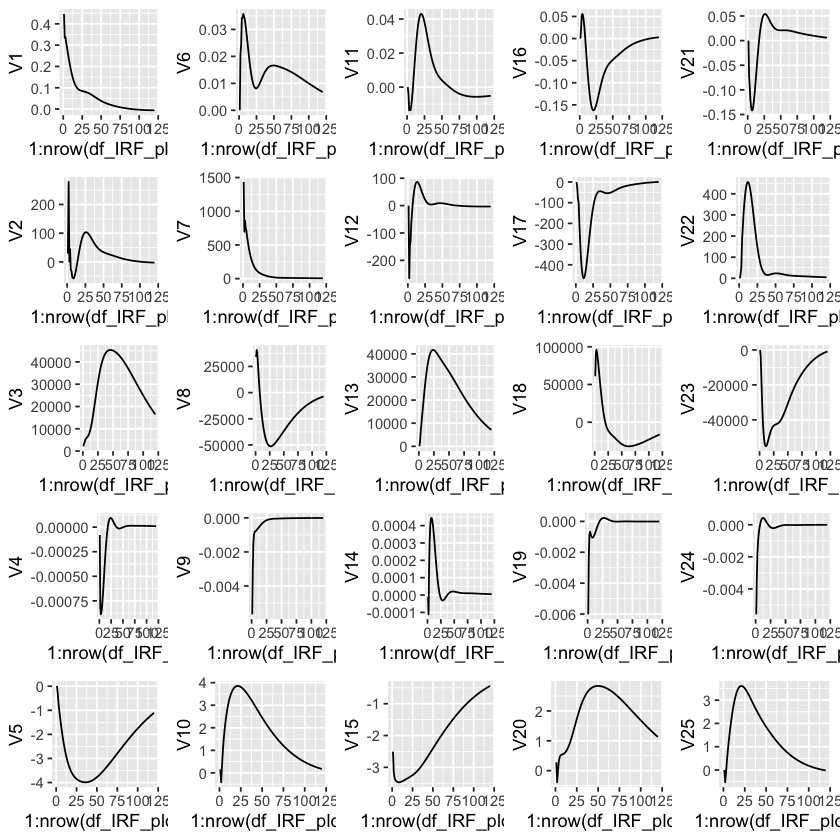

In [15]:
multiplot(p1,p2,p3,p4,p5,
          p6,p7,p8,p9,p10,
          p11,p12,p13,p14,p15,
          p16,p17,p18,p19,p20,
          p21,p22,p23,p24,p25,
          cols = 5)

```R
# For shock 1
multiplot(p1,p2,p3,p4,p5,
          cols = 2)
# For shock 2
multiplot(p6,p7,p8,p9,p10,
          cols = 2)
# For shock 3
multiplot(p11,p12,p13,p14,p15,
          cols = 2)
# For shock 4
multiplot(p16,p17,p18,p19,p20,
          cols = 2)
# For shock 5
multiplot(p21,p22,p23,p24,p25,
          cols = 2)
```

## IRF (Bootstrap C.I.)

Steps:

1. 從殘差取後放回重抽T個

2. 從估計值加上重抽的T個殘差，得到5條 period為T的pseudo time series

3. 從pseudo time series再估SVAR及IRF

    a. 估的時候是固定已經得到的 $\hat{A}, \hat{B}$ matrix來計算IRF
    
    b. 估的條件相似，是當重抽一組residual並得到pseudo time series後，一樣要 $se(\hat{A}), se(\hat{B})$ 存在才算進一個bootstrap statistics
    
    c. 停止條件是蒐集到1000條

4. 從IRF的2.5% quantile跟97.5%quantile找到IRF的95% C.I.

存法：用arrary：

1. row數為總期間減去lag期數

2. column數為變數總數的平方（shock1對y1,..., shock5對y5）

3. page數為Bootstrap重複的次數

```R
lower = 0.025                                        # 控制成 95% CI
upper = 1-lower
kk = ncol(By)
ddY = VAR.ddY(By, VAR.P)
ddX = VAR.ddX(By, VAR.P)
# obs:119 lag:2 -> 117
# Y: 5 vairables
# X: 5個變數的t-1, t-2 -> 10 variables
dim(ddY); dim(ddX)

T   = nrow(ddY)
T.total= nrow(By)
Ik  = diag(rep(1, kk))
# 55 coef.
Coef = t(VAR.EbyE(ddY, ddX, CONST)$ddA)              # Step 1 估計模型
# residuals
U    = VAR.EbyE(ddY, ddX, CONST)$ddU

#BSigma.u = VAR.ddSigma.OLS(ddY, ddX, CONST)
if(CONST == TRUE){
  const = Coef[, ncol(Coef)]
  Coef.noc= Coef[,-ncol(Coef)]                      # 刪掉 const
}else{
  const = matrix(0, kk, 1)
  Coef.noc = Coef
}
dm.U <- U-mean(U)
#dm.U = scale(U, scale = FALSE)                       # Step 2 減去殘差的平均數
N = 1000 #重抽次數
dim(ddX); dim(Coef.noc); dim(dm.U)
#Y.sim <- matrix(const, nrow = 117, ncol = 5, byrow = T) + ddX %*% t(Coef.noc) + dm.U

# 存N次重抽的IRF
df_IRF.sim <- array(NA, c(120,25,N)) #dimensions are: Time Period, Number of shock interacts with variables, page (number of Bootstrap resamplings)
counter <- 1
while(TRUE){
  rm(Y.sim); rm(SVAR_AB_est.sim)
  cat("Now, there are ", counter-1, " sets of resamples.\n")
  Y.sim = matrix(0, nrow = T.total, ncol = kk)          # Y.sim = 0 #pseudo time series
  Y.sim[c(1:VAR.P),] = By[c(1:VAR.P), ]
  boot.number = sample(c(1:T), replace = TRUE)      # Step 3 取出放回
  U.sim = dm.U[boot.number,]
  
  Y.sim[-c(1:VAR.P),] <- matrix(const, nrow = 117, ncol = 5, byrow = T) + ddX %*% t(Coef.noc) + U.sim
  #`Y.sim` is the pseudo time series
  # Step 5 重新估算SVAR
  
  ### SVAR.sim Start ###
  SVAR_AB_est.sim <- try(VAR.svarest.AB(Y.sim, VAR.P, Amat, Bmat, CONST, start = "normal"), silent = T)
  if(class(SVAR_AB_est.sim)=="try-error"){
    print(Y.sim[length(Y.sim)])
    print(U.sim[length(U.sim)])
    print("Bad Trial")
    next
  }
  A0.Std.sim <- try(SVAR_AB_est.sim$A0.Std, silent = T)
  B0.Std.sim <- try(SVAR_AB_est.sim$B0.Std, silent = T)
  cat(class(A0.Std.sim), "\t", class(B0.Std.sim), "\n")
  
  if(class(A0.Std.sim)=="try-error" | class(B0.Std.sim)=="try-error" ){
    cat("This iteration turns out a bad result. Try next.\n")
    next
  }
  
  if(sum(is.na(A0.Std.sim))==0 && sum(is.na(B0.Std.sim))==0){
    #IRF
    SVAR_AB_IRF.sim <- VAR.svarirf.AB(Y.sim, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est)#.sim)
    cat("This iteration turns out a proper result. \n
        Estimate its IRF and save.\n")
  }else{
    next
  }
  # SVAR_AB_IRF.sim <- VAR.svarirf.AB(Y.sim, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est.sim)
  # cat("This iteration turns out a proper result. \n
  #     Estimate its IRF and save.\n")
  
  # 5*5個圖的time series
  df_IRF_plot.sim <- matrix(NA, 120, 25) #%>% as.tibble()
  # df_IRF.sim <- array(1:(120*25*N), c(120,25,N))
  # df_IRF.sim[2,1,1] # slicing
  
  h <- 0 # h表示第幾期的IRF
  for(period in SVAR_AB_IRF.sim){
    k <- 0 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
    h <- h+1 # h表示第幾期的IRF
    for(j in 1:5){
      for(i in 1:5){
        k <- k+1 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
        df_IRF_plot.sim[h,k] <- period[i,j]
      }
    }
  }
  # 把這一次重抽得到的IRF append進`df_IRF.sim`中
  df_IRF.sim[,,counter] <- df_IRF_plot.sim
  ### SVAR.sim Ends ###
  if(counter>=N){
    break
  }
  counter <- counter+1
}
```

```R
# Save
saveRDS(df_IRF.sim, file = "df_IRF.sim_v5i1-unif92746.rds")
```

In [16]:
df_IRF.sim <- read_rds("/Users/Andy 1/Google 雲端硬碟 (r08323004@g.ntu.edu.tw)/0 Semesters/Thesis/6_VAR_model/R/seeds/v5_identification1/df_IRF.sim_v5i1-unif92746.rds")

In [17]:
# 看某一頁
head(df_IRF.sim[,,1000])

0.4464141,28.93609,2148.088,-0.00008045926,0.00985769,0.0000000,1434.5569,33964.5754,-0.005662539,0.1565781,⋯,-0.000000000000002600733,-0.000000000000211965,60986.22,-0.0060172150,0.281149,-0.000000000000000000001430831,-0.00000000000000000004504615,0.01518295,-0.0055831206,0.00000006999403
0.2312442,-170.94341,3541.442,-0.00072634556,-0.72484025,0.2019147,742.3865,13147.0765,-0.001442130,3.5802054,⋯,0.215184045009064572884,-122.415003531465643505,41079.04,0.0001092602,3.684454,0.066944485129684844215702810,-106.12684326583874394600570668,-11090.08602481,-0.0010579947,1.31747836002834
0.2870741,-100.47892,7082.725,-0.00036709194,-0.97516320,0.1442950,890.9440,300.1284,-0.001546163,3.3281419,⋯,0.058131404154795472683,-10.059477958541275910,27610.00,-0.0019359905,2.945775,0.003889059028348879499398238,109.08159072608937378845439525,-25167.57952793,-0.0014303067,1.49213511729848
0.2297895,-140.01696,7094.692,-0.00061508903,-1.21170767,0.2026764,642.0386,-4460.3244,-0.001495427,3.5551066,⋯,0.114042549603380366507,-198.889887524242652717,25111.52,-0.0013228325,2.935470,0.008805026162484765744897786,58.53330448999631130391207989,-29015.35856464,-0.0009606784,1.53474544942254
0.2183408,-125.02452,8496.107,-0.00048217962,-1.47333252,0.2208282,527.9564,-8809.3135,-0.001035859,3.6712877,⋯,0.089952227784678207012,-214.886127832614903355,17901.57,-0.0010787659,3.020225,0.008026605474255630451319021,106.10824806842379075533244759,-33301.78216835,-0.0004907974,1.72800711223813
0.1913461,-119.75638,8730.248,-0.00048353102,-1.64894609,0.2332453,410.6246,-11947.0284,-0.001064393,3.6470664,⋯,0.077913462890697407492,-261.935095117631021822,13143.83,-0.0010884241,2.905953,0.002950837940728562314163241,121.11396245933816828710405389,-35641.51278819,-0.0003745566,1.77658494958682


### 畫IRF & Bootstrap C.I.

In [18]:
df_IRF_plot.BS.L <- matrix(NA, 120, 25)
df_IRF_plot.BS.U <- matrix(NA, 120, 25)
df_IRF_plot.BS.Median <- matrix(NA, 120, 25)
df_IRF_plot.BS.Mean <- matrix(NA, 120, 25)
for(col in 1:25){
  for(row in 1:120){
    df_IRF_plot.BS.L[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.025)
    df_IRF_plot.BS.U[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.975)
    df_IRF_plot.BS.Median[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.5)
    df_IRF_plot.BS.Mean[row,col] <- mean(df_IRF.sim[row,col,])
  }
}

df_IRF_plot.BS.L <- df_IRF_plot.BS.L %>% as_tibble()
df_IRF_plot.BS.U <- df_IRF_plot.BS.U %>% as_tibble()
df_IRF_plot.BS.Median <- df_IRF_plot.BS.Median %>% as_tibble()
df_IRF_plot.BS.Mean <- df_IRF_plot.BS.Mean %>% as_tibble()

```R
##### Plot #####

shock1y1 <- bind_cols(df_IRF_plot.BS.L$V1, df_IRF_plot.BS.U$V1,
                      df_IRF_plot.BS.Median$V1, df_IRF_plot.BS.Mean$V1, 
                      df_IRF_plot$V1)
colnames(shock1y1) <- c("Lower", "Upper", "Median", "Mean", "IRF")
ggplot(shock1y1) + 
  geom_line(aes(x = 1:nrow(shock1y1), y = Lower), linetype = "dashed")+
  geom_line(aes(x = 1:nrow(shock1y1), y = Upper), linetype = "dashed")+
  geom_line(aes(x = 1:nrow(shock1y1), y = Median), col = "Blue")+
  geom_line(aes(x = 1:nrow(shock1y1), y = Mean), col = "Red")
ggplot(shock1y1) +
  geom_line(aes(x = 1:nrow(shock1y1), y = IRF), col = "Red")+
  geom_line(aes(x = 1:nrow(shock1y1), y = Lower), linetype = "dashed")+
  geom_line(aes(x = 1:nrow(shock1y1), y = Upper), linetype = "dashed")

```

In [19]:
ind <- 0
for(i in 1:5){
  for(j in 1:5){
    ind <- ind+1
    nam <- paste("shock", j, "y", i, sep = '')
    assign(nam, bind_cols(df_IRF_plot.BS.L[ind], df_IRF_plot.BS.U[ind],
                          df_IRF_plot.BS.Median[ind], df_IRF_plot.BS.Mean[ind]))
    # 改名
    evalStr <- paste0("colnames(", nam, ") <- c('Lower', 'Upper', 'Median', 'Mean')")
    eval(parse(text=evalStr))
    # 圖層
    evalStr <- paste0("p", ind, " <- ", "ggplot(",nam,") + geom_line(aes(x = 1:nrow(", nam, "), y = Lower), linetype = 'dashed', col='black')+geom_line(aes(x = 1:nrow(", nam, "), y = Upper), linetype = 'dashed', col='black')+geom_line(aes(x = 1:nrow(", nam, "), y = Mean), col = 'Blue')")
    eval(parse(text=evalStr))
  }
}

New names:
* V1 -> V1...1
* V1 -> V1...2
* V1 -> V1...3
* V1 -> V1...4

New names:
* V2 -> V2...1
* V2 -> V2...2
* V2 -> V2...3
* V2 -> V2...4

New names:
* V3 -> V3...1
* V3 -> V3...2
* V3 -> V3...3
* V3 -> V3...4

New names:
* V4 -> V4...1
* V4 -> V4...2
* V4 -> V4...3
* V4 -> V4...4

New names:
* V5 -> V5...1
* V5 -> V5...2
* V5 -> V5...3
* V5 -> V5...4

New names:
* V6 -> V6...1
* V6 -> V6...2
* V6 -> V6...3
* V6 -> V6...4

New names:
* V7 -> V7...1
* V7 -> V7...2
* V7 -> V7...3
* V7 -> V7...4

New names:
* V8 -> V8...1
* V8 -> V8...2
* V8 -> V8...3
* V8 -> V8...4

New names:
* V9 -> V9...1
* V9 -> V9...2
* V9 -> V9...3
* V9 -> V9...4

New names:
* V10 -> V10...1
* V10 -> V10...2
* V10 -> V10...3
* V10 -> V10...4

New names:
* V11 -> V11...1
* V11 -> V11...2
* V11 -> V11...3
* V11 -> V11...4

New names:
* V12 -> V12...1
* V12 -> V12...2
* V12 -> V12...3
* V12 -> V12...4

New names:
* V13 -> V13...1
* V13 -> V13...2
* V13 -> V13...3
* V13 -> V13...4

New names:
* V14 -> V14...1
* V1

In [20]:
Text_Size_Theme = theme(
  axis.title.x = element_text(size = 12),
  axis.text.x = element_text(size = 12),
  axis.title.y = element_text(size = 12),
  axis.title = element_text(size = 12),
  plot.title = element_text(size=12))

## shock1
p1 <- p1+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Monetary Policy Shock')+Text_Size_Theme
p2 <- p2+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Monetary Policy Shock')+Text_Size_Theme
p3 <- p3+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Loan to Monetary Policy Shock')+Text_Size_Theme
p4 <- p4+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Sentiment Index to Monetary Policy Shock')+Text_Size_Theme
p5 <- p5+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Monetary Policy Shock')+Text_Size_Theme

## shock2
p6 <- p6+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Housing Supply Shock')+Text_Size_Theme
p7 <- p7+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Housing Supply Shock')+Text_Size_Theme
p8 <- p8+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Loan to Housing Supply Shock')+Text_Size_Theme
p9 <- p9+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Sentiment Index to Housing Supply Shock')+Text_Size_Theme
p10 <- p10+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Housing Supply Shock')+Text_Size_Theme

## shock3
p11 <- p11+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Housing Demand Shock')+Text_Size_Theme
p12 <- p12+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Housing Demand Shock')+Text_Size_Theme
p13 <- p13+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Loan to Housing Demand Shock')+Text_Size_Theme
p14 <- p14+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Sentiment Index to Housing Demand Shock')+Text_Size_Theme
p15 <- p15+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Housing Demand Shock')+Text_Size_Theme

## shock4
p16 <- p16+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Housing Price Expectation Shock')+Text_Size_Theme
p17 <- p17+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Housing Price Expectation Shock')+Text_Size_Theme
p18 <- p18+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Loan to Housing Price Expectation Shock')+Text_Size_Theme
p19 <- p19+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Sentiment Index to Housing Price Expectation Shock')+Text_Size_Theme
p20 <- p20+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Housing Price Expectation Shock')+Text_Size_Theme

## shock5
p21 <- p21+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Housing Speculation Shock')+Text_Size_Theme
p22 <- p22+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Housing Speculation Shock')+Text_Size_Theme
p23 <- p23+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Loan to Housing Speculation Shock')+Text_Size_Theme
p24 <- p24+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Sentiment Index to Housing Speculation Shock')+Text_Size_Theme
p25 <- p25+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Housing Speculation Shock')+Text_Size_Theme

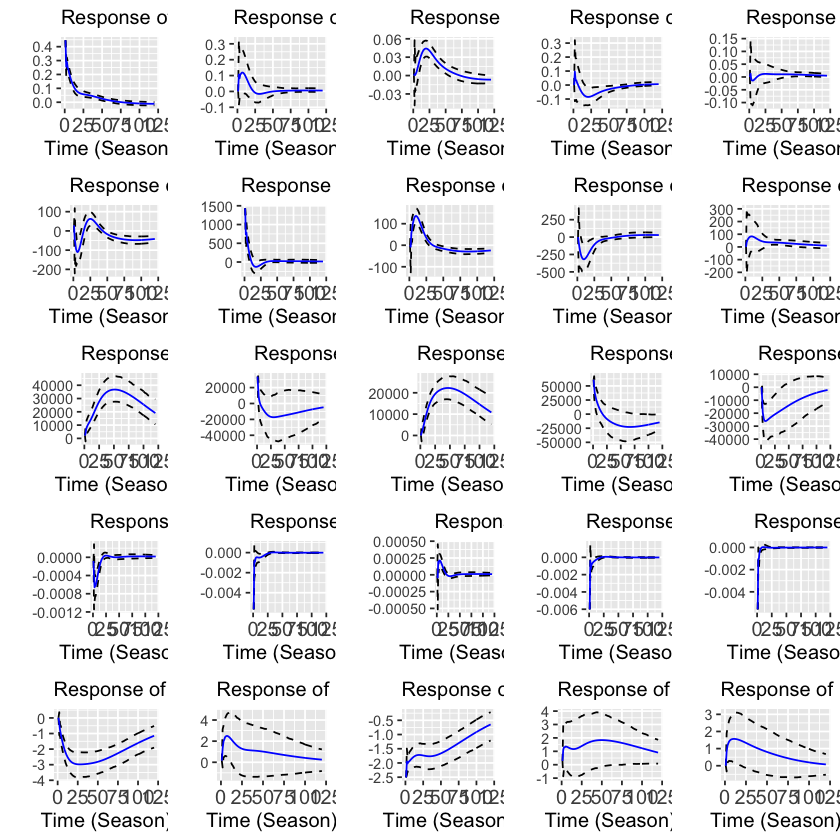

In [21]:
multiplot(p1,p2,p3,p4,p5,
          p6,p7,p8,p9,p10,
          p11,p12,p13,p14,p15,
          p16,p17,p18,p19,p20,
          p21,p22,p23,p24,p25,
          cols = 5)

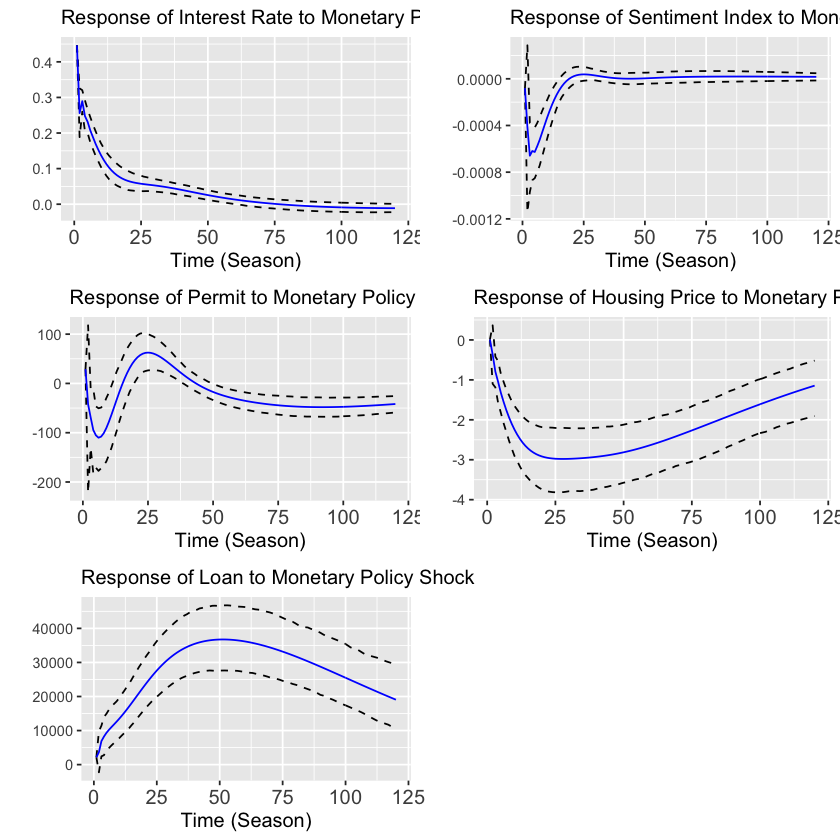

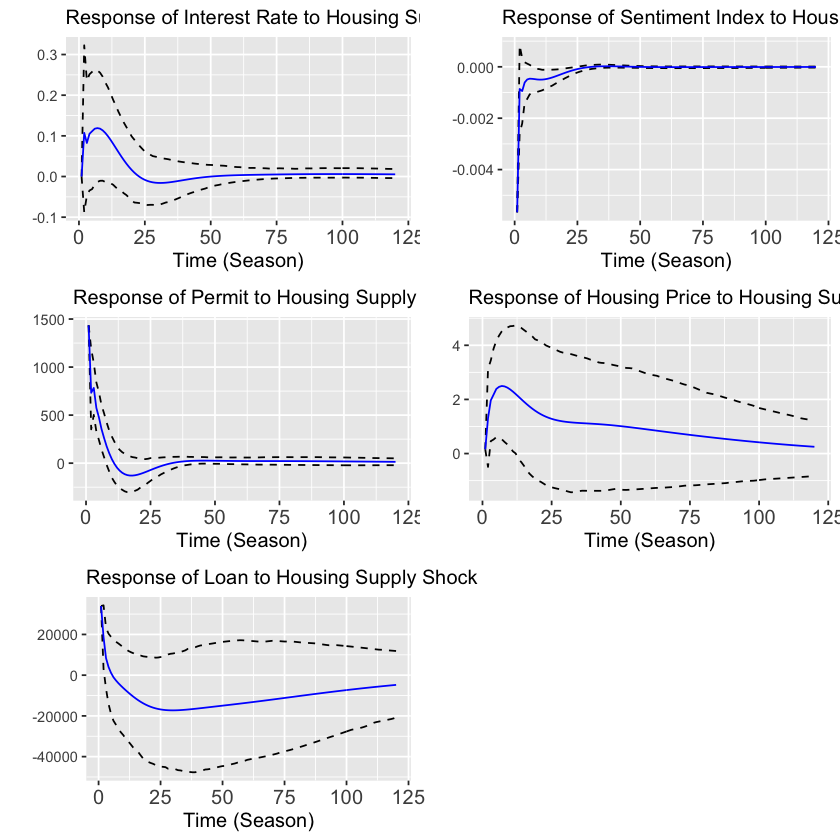

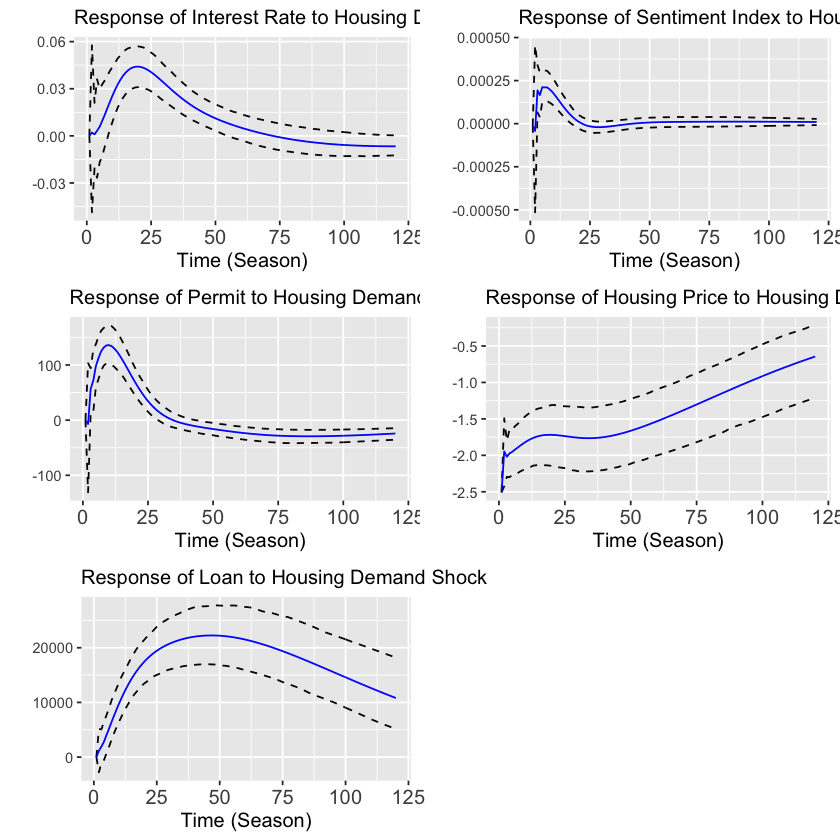

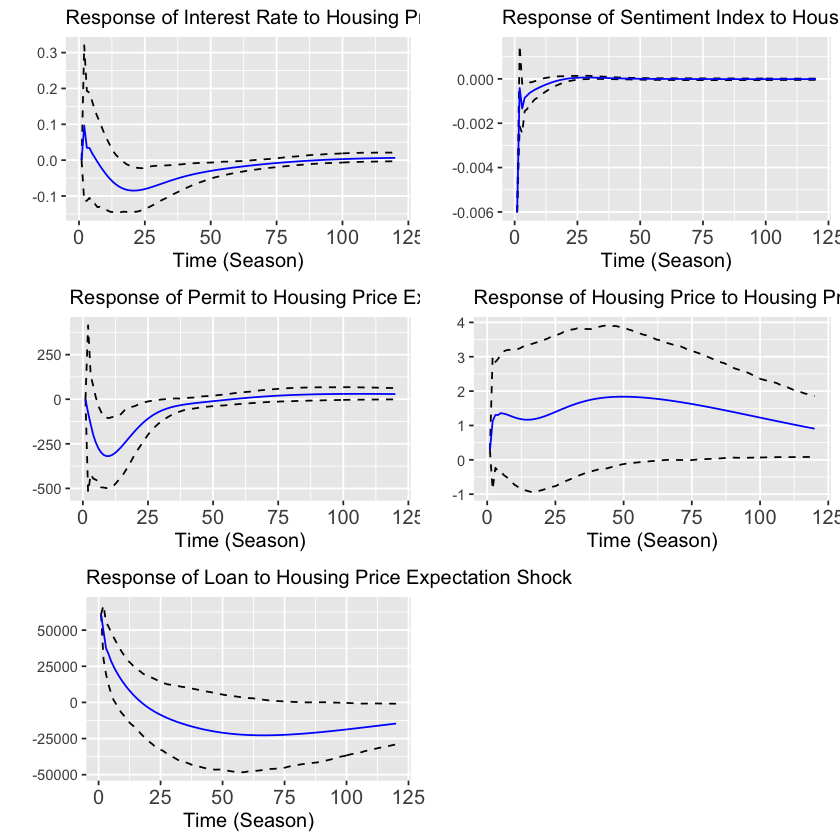

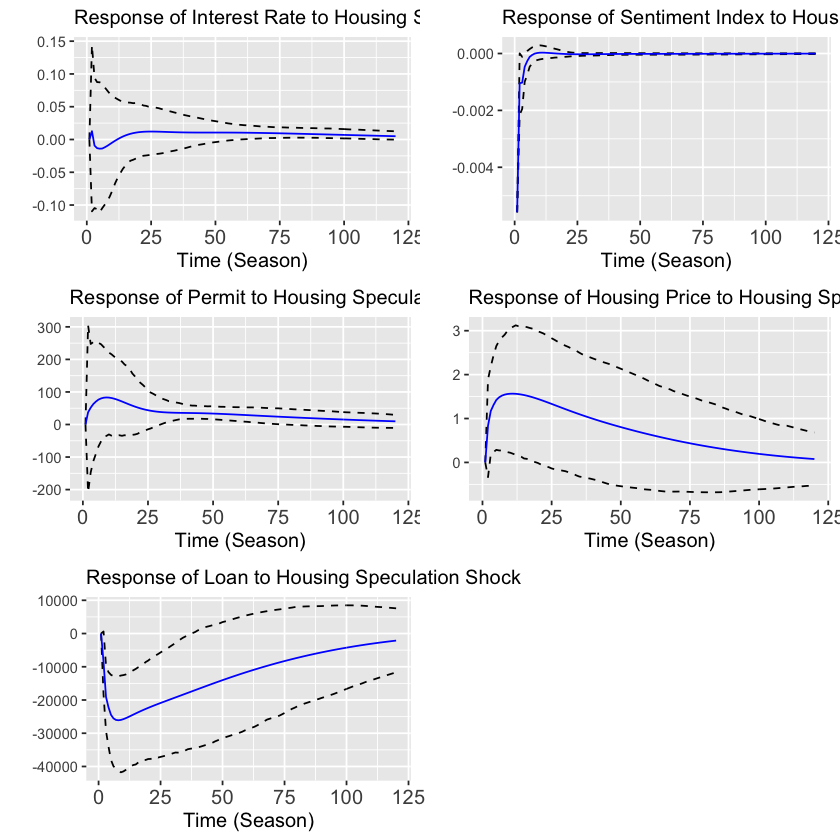

In [22]:
# For shock 1
multiplot(p1,p2,p3,p4,p5,
          cols = 2)
# For shock 2
multiplot(p6,p7,p8,p9,p10,
          cols = 2)
# For shock 3
multiplot(p11,p12,p13,p14,p15,
          cols = 2)
# For shock 4
multiplot(p16,p17,p18,p19,p20,
          cols = 2)
# For shock 5
multiplot(p21,p22,p23,p24,p25,
          cols = 2)

In [23]:
# save plot
# shock 1
ggsave(filename = "figure/SVAR_v5i1-unif92746_IRF_shock1.png", 
       plot = multiplot(p1,p2,p3,p4,p5, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

# shock 2
ggsave(filename = "figure/SVAR_v5i1-unif92746_IRF_shock2.png", 
       plot = multiplot(p6,p7,p8,p9,p10, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

# shock 3
ggsave(filename = "figure/SVAR_v5i1-unif92746_IRF_shock3.png", 
       plot = multiplot(p11,p12,p13,p14,p15, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

# shock 4
ggsave(filename = "figure/SVAR_v5i1-unif92746_IRF_shock4.png", 
       plot = multiplot(p16,p17,p18,p19,p20, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

# shock 5
ggsave(filename = "figure/SVAR_v5i1-unif92746_IRF_shock5.png", 
       plot = multiplot(p21,p22,p23,p24,p25, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

## Variance Decomposition

In [24]:
# `ddTheta` 放已經估出來的IRF (至於要放怎樣穩定的還要再想)
# m表示對於第幾個變數的變異數分解（如第五個是對房價的變異數分解）
SVAR_AB_VarDecomp <- VAR.svardecomp.AB(m = 5, By, VAR.P,
                                       AMat, BMat, h=120,
                                       Const=TRUE, ddTheta = SVAR_AB_IRF)
tail(SVAR_AB_VarDecomp*100)

h=115,32.49889,18.86632,19.55320,15.97857,13.10302
h=116,32.51204,18.84805,19.54062,16.01004,13.08926
h=117,32.52450,18.83057,19.52855,16.04022,13.07616
h=118,32.53631,18.81386,19.51696,16.06916,13.06371
h=119,32.54749,18.79789,19.50585,16.09690,13.05187
h=120,32.55808,18.78263,19.49519,16.12348,13.04063


In [26]:
# table
SVAR_VD <- (SVAR_AB_VarDecomp*100) %>% as.tibble()
SVAR_VD <- SVAR_VD %>% filter(row_number(V1) %in% c(1,2,4,8,12,20,40,60,80,120)) %>%
    mutate(period = c(1,2,4,8,12,20,40,60,80,120)) %>%
    select(period = period,
           mp = V1,
           hs = V2,
           hd = V3,
           expectation = V4,
           sp = V5) %>%
    mutate(period = as.character(period),
           mp = round(mp, digits = 2),
           hs = round(hs, digits = 2),
           hd = round(hd, digits = 2),
           expectation = round(expectation, digits = 2),
           sp = round(sp, digits = 2))
SVAR_VD

period,mp,hs,hd,expectation,sp
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00,0.38,98.38,1.24,0.00
2,0.61,1.16,95.23,1.36,1.64
4,4.22,2.89,91.10,0.78,1.01
8,11.03,14.39,67.40,1.07,6.11
12,15.46,21.04,50.38,1.04,12.09
20,20.09,25.23,34.39,1.48,18.81
40,25.74,24.65,24.55,6.19,18.87
60,29.35,22.10,21.80,10.75,16.01
80,31.30,20.27,20.48,13.68,14.28


In [27]:
tab_VD <- xtable(SVAR_VD, caption= "房價指數的變異數分解", align=c("c","c","c","c","c","c","c"))
print(tab_VD, include.rownames=FALSE)

% latex table generated in R 3.6.2 by xtable 1.8-4 package
% Sun Jan 24 05:57:09 2021
\begin{table}[ht]
\centering
\begin{tabular}{cccccc}
  \hline
period & mp & hs & hd & expectation & sp \\ 
  \hline
1.00 & 0.00 & 0.38 & 98.38 & 1.24 & 0.00 \\ 
  2.00 & 0.61 & 1.16 & 95.23 & 1.36 & 1.64 \\ 
  4.00 & 4.22 & 2.89 & 91.10 & 0.78 & 1.01 \\ 
  8.00 & 11.03 & 14.39 & 67.40 & 1.07 & 6.11 \\ 
  12.00 & 15.46 & 21.04 & 50.38 & 1.04 & 12.09 \\ 
  20.00 & 20.09 & 25.23 & 34.39 & 1.48 & 18.81 \\ 
  40.00 & 25.74 & 24.65 & 24.55 & 6.19 & 18.87 \\ 
  60.00 & 29.35 & 22.10 & 21.80 & 10.75 & 16.01 \\ 
  80.00 & 31.30 & 20.27 & 20.48 & 13.68 & 14.28 \\ 
  120.00 & 32.56 & 18.78 & 19.50 & 16.12 & 13.04 \\ 
   \hline
\end{tabular}
\caption{房價指數的變異數分解} 
\end{table}


In [28]:
print(tab_VD, file="table/SVAR_v5i1-unif92746_VD.tex",
      include.rownames=FALSE,
      append=T, table.placement = "h",
      caption.placement="bottom", hline.after=seq(from=-1,to=nrow(tab_VD),by=1))

## Historical Decomposition

In [29]:
SVAR_AB_HistDecomp <- VAR.svarhist.AB(By, VAR.P, Amat, Bmat, CONST)
dim(SVAR_AB_HistDecomp)

[1] 119  25

In [30]:
#----- Base Project 估計 -----#
SVAR_AB_Hist.c0 = VAR.baseproject(By, VAR.P, CONST)
head(SVAR_AB_Hist.c0)
dim(SVAR_AB_Hist.c0)
dim(By)

1,7.180000,10465.00,1051038,0.005097271,98.1600
2,8.270000,17129.00,1073968,0.015780528,104.1600
,7.675291,17136.35,1084673,0.014417542,104.2331
,7.431884,17351.92,1131749,0.016005012,103.1554
,7.217294,17559.81,1196077,0.017739689,102.2756
,7.068041,17675.20,1270418,0.019299676,101.6163


[1] 119   5

[1] 119   5

In [31]:
# 實際時間序列與基本預測時間序列之偏離值
head(By-SVAR_AB_Hist.c0)

,interest_rate,permit,loan,Sentiment,hp
1,0.00000000,0.0000,0.00,0.000000000,0.000000
2,0.00000000,0.0000,0.00,0.000000000,0.000000
3,0.09137594,195.6465,26935.89,0.001708533,2.446907
4,-1.40921685,2822.0828,41512.46,0.002446206,6.834601
5,-0.84396048,1730.1946,34623.49,-0.004591036,10.934421
6,0.65062518,7036.8030,67892.13,-0.001928391,16.203727


In [32]:
# 只有特定衝擊下的時間序列與基本預測時間序列之偏離值
## shock1: monetary policy shock
head(SVAR_AB_HistDecomp[,c(1,6,11,16,21)])

NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
0.09137594,5.922891,439.6895,-0.00001646911,0.002017758
-1.48393759,-43.573752,-6753.6530,0.00011216082,-0.100358580
-1.05439613,-966.395495,-11198.6593,0.00265902664,0.967213243
0.47596787,129.775675,-4402.3271,0.00255584552,2.444037001


In [33]:
##左：baseline上 hp 的變化；右：shock1 對 hp 的衝擊
cbind((By-SVAR_AB_Hist.c0)[,5], 
      (SVAR_AB_HistDecomp[,c(1,6,11,16,21)])[,5])

1,0.000000,NA
2,0.000000,NA
3,2.446907,0.002017758
4,6.834601,-0.100358580
5,10.934421,0.967213243
6,16.203727,2.444037001
7,18.147015,2.197999071
8,18.238022,2.050487741
9,18.590100,3.030050317
10,16.544997,3.291982217
11,24.003994,3.275972795


### 對「房價」的歷史分解：monetary policy shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



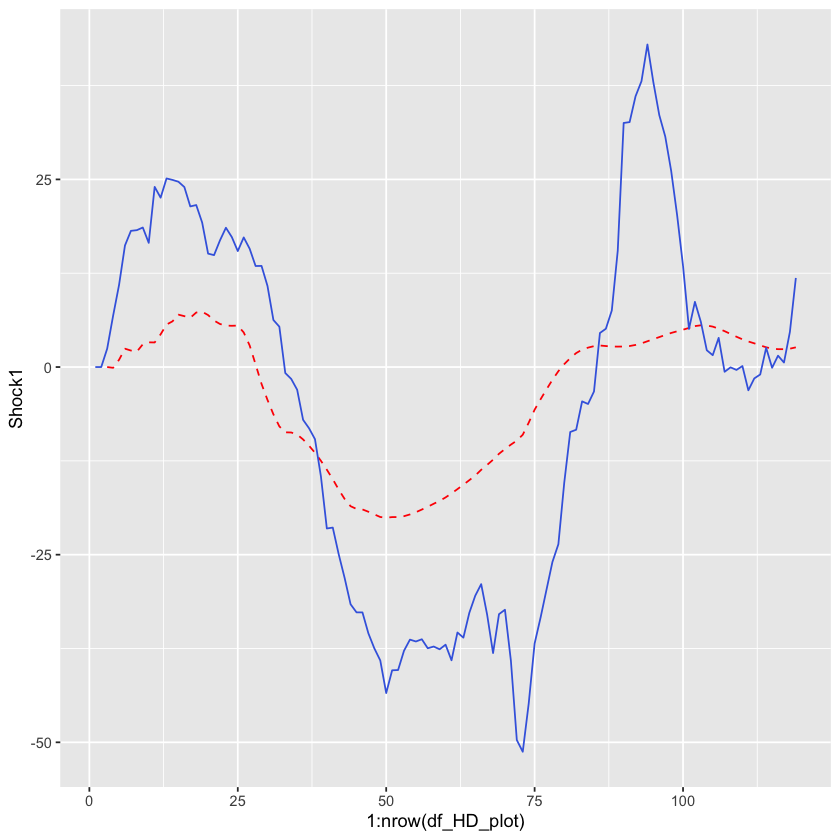

In [34]:
df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(1,6,11,16,21)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock1")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock1), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')


### 對「房價」的歷史分解：supply shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



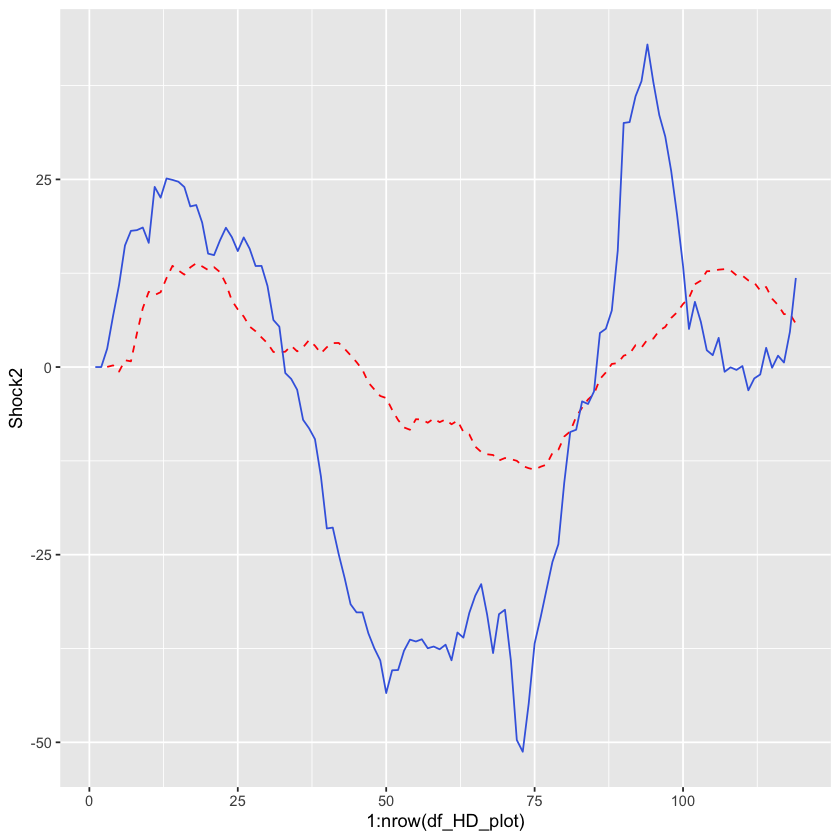

In [35]:
# ## shock2: housing price expectation shock
# SVAR_AB_HistDecomp[,c(2,7,12,17,22)]-SVAR_AB_Hist.c0
# ## baseline上 hp 的變化
# (By-SVAR_AB_Hist.c0)[,5]
# ## shock2 對 hp 的衝擊
# (SVAR_AB_HistDecomp[,c(2,7,12,17,22)])[,5]

df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(2,7,12,17,22)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock2")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock2), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### 對「房價」的歷史分解：demand shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



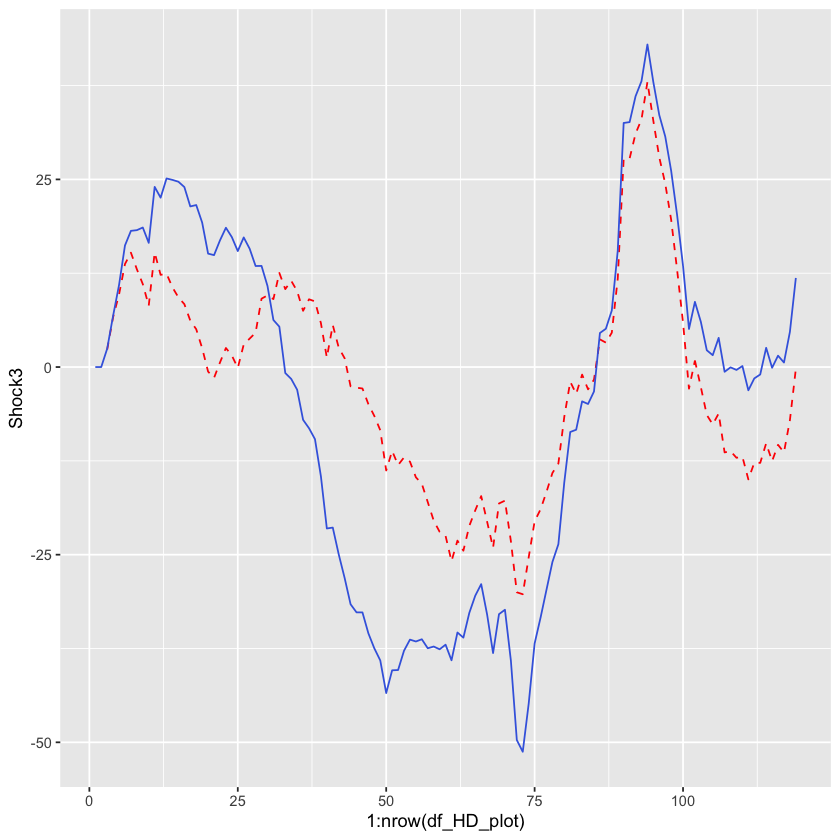

In [36]:
# ## shock3: supply shock
# SVAR_AB_HistDecomp[,c(3,8,13,18,23)]-SVAR_AB_Hist.c0
# ## baseline上 hp 的變化
# (By-SVAR_AB_Hist.c0)[,5]
# ## shock3 對 hp 的衝擊
# (SVAR_AB_HistDecomp[,c(3,8,13,18,23)])[,5]

df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(3,8,13,18,23)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock3")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock3), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### 對「房價」的歷史分解：housing price expectation shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



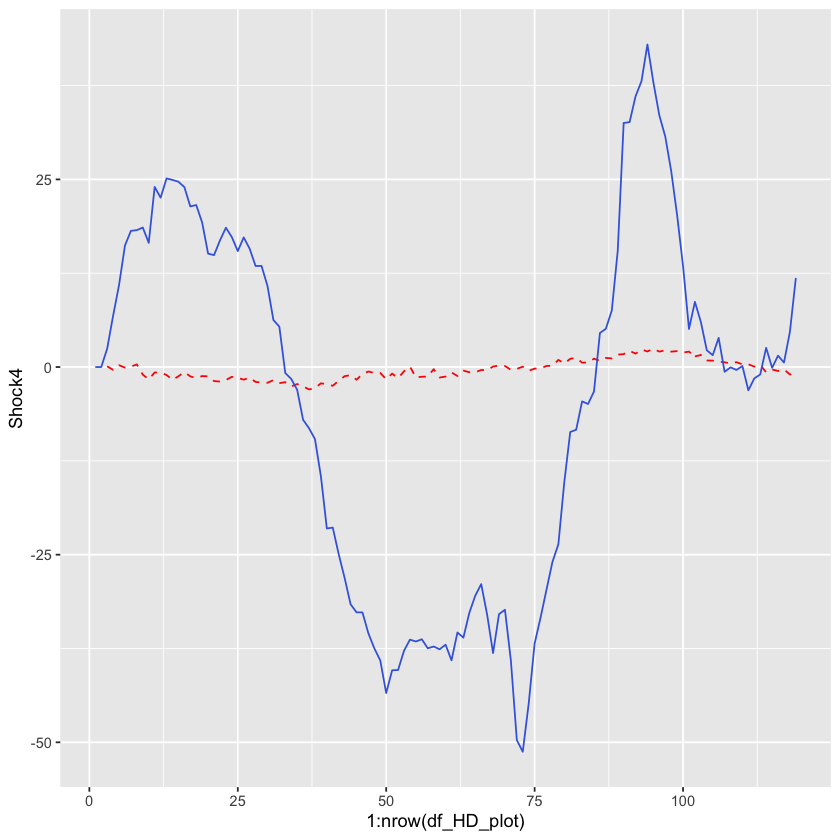

In [37]:
# ## shock4: demand shock
# SVAR_AB_HistDecomp[,c(4,9,14,19,24)]-SVAR_AB_Hist.c0
# ## baseline上 hp 的變化
# (By-SVAR_AB_Hist.c0)[,5]
# ## shock4 對 hp 的衝擊
# (SVAR_AB_HistDecomp[,c(4,9,14,19,24)])[,5]

df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(4,9,14,19,24)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock4")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock4), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### 對「房價」的歷史分解：housing speculation shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



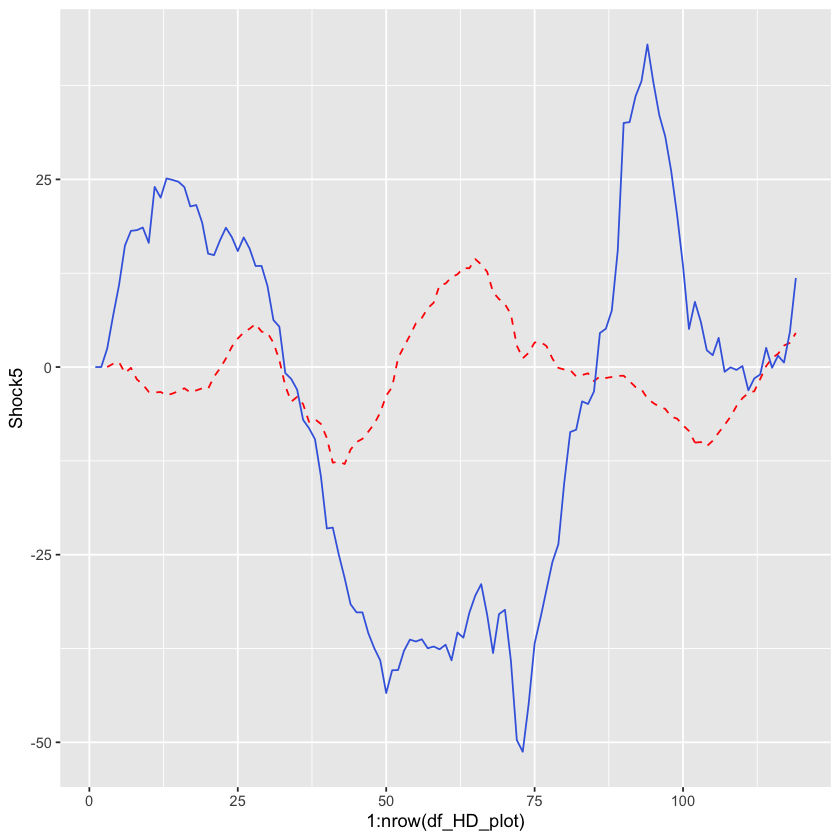

In [38]:
## shock5: housing speculation shock
#SVAR_AB_HistDecomp[,c(5,10,15,20,25)]-SVAR_AB_Hist.c0
## baseline上 hp 的變化
#(By-SVAR_AB_Hist.c0)[,5]
## shock5 對 hp 的衝擊
#(SVAR_AB_HistDecomp[,c(5,10,15,20,25)])[,5]

df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(5,10,15,20,25)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock5")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock5), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### Table

In [39]:
t_label <- c()
year_label <- c()
season_label <- c()
year <- 1991
for(q in 1:119){
    if(q%%4==0){
        t_label <- c(t_label, paste0(year, "Q4", sep = ""))
        year_label <- c(year_label, year)
        season_label <- c(season_label, 4)
        year <- year+1
    }else{
        t_label <- c(t_label, paste0(year, "Q", q%%4, sep = ""))
        year_label <- c(year_label, year)
        season_label <- c(season_label, q%%4)
    }
}

In [40]:
df_HD <- bind_cols(t_label,
                   year_label,
                   season_label,
                   (By-SVAR_AB_Hist.c0)[,5],
                   SVAR_AB_HistDecomp[,21],
                   SVAR_AB_HistDecomp[,22],
                   SVAR_AB_HistDecomp[,23],
                   SVAR_AB_HistDecomp[,24],
                   SVAR_AB_HistDecomp[,25])
colnames(df_HD) <- c("Time", "Year", "Season", "BaseLine", "mp", "hs", "hd", "expectation", "sp")
tail(df_HD)

New names:
* NA -> ...1
* NA -> ...2
* NA -> ...3
* NA -> ...4
* NA -> ...5
* ...



Time,Year,Season,BaseLine,mp,hs,hd,expectation,sp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019Q2,2019,2,2.56226767,2.631506,10.666301,-10.1622472,-0.6967977,0.1235063
2019Q3,2019,3,-0.09624669,2.454016,9.104103,-12.5309459,-0.3224159,1.1989968
2019Q4,2019,4,1.51354890,2.381738,8.259780,-10.3631556,-0.5247991,1.7599856
2020Q1,2020,1,0.60145802,2.379102,7.045384,-11.3693211,-0.3114571,2.8577504
2020Q2,2020,2,4.68727347,2.446385,7.080144,-7.0842936,-0.9921497,3.2371881
2020Q3,2020,3,11.87077788,2.625383,5.775737,-0.2368947,-0.8368240,4.5433765


In [42]:
# 全樣本
HD_seq1 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    hs = hs/BaseLine*100,
                    hd = hd/BaseLine*100,
                    expectation = expectation/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
summarise(mp = median(mp),
          hs = median(hs),
          hd = median(hd),
          expectation = median(expectation),
          sp = median(sp))

# 房價持平期
HD_seq2 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    hs = hs/BaseLine*100,
                    hd = hd/BaseLine*100,
                    expectation = expectation/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
filter(Year<2003) %>%
summarise(mp = median(mp),
          hs = median(hs),
          hd = median(hd),
          expectation = median(expectation),
          sp = median(sp))

# 房價上升期
HD_seq3 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    hs = hs/BaseLine*100,
                    hd = hd/BaseLine*100,
                    expectation = expectation/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
filter(Year>=2003) %>%
summarise(mp = median(mp),
          hs = median(hs),
          hd = median(hd),
          expectation = median(expectation),
          sp = median(sp))

In [47]:
HD_seq <- bind_rows(HD_seq1, HD_seq2, HD_seq3)
HD.table <- bind_cols(c("全樣本(1991Q1-2020Q3)","房價持平期(1991Q1-2002Q4)","房價上升期(2003Q1-2020Q3)"), HD_seq)
colnames(HD.table) <- c("樣本期間", 
                        "Montary Policy Shock", 
                        "Housing Supply Shock",
                        "Housing Demand Shock",
                        "Housing Price Expectation Shock",
                        "Housing Speculation Shock")
HD.table

New names:
* NA -> ...1



樣本期間,Montary Policy Shock,Housing Supply Shock,Housing Demand Shock,Housing Price Expectation Shock,Housing Speculation Shock
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
全樣本(1991Q1-2020Q3),32.39870,25.71953,49.49997,1.228778,-5.746918
房價持平期(1991Q1-2002Q4),31.21519,29.30873,17.37803,-3.124960,18.827485
房價上升期(2003Q1-2020Q3),33.78841,25.14118,56.78580,1.846868,-10.012407


In [48]:
# 生出table
tab_HD <- xtable(HD.table, caption= "歷史分解下各衝擊的解釋力比率(%)", align=c("c","c","c","c","c","c","c"))
print(tab_HD, include.rownames=FALSE)

% latex table generated in R 3.6.2 by xtable 1.8-4 package
% Sun Jan 24 06:07:09 2021
\begin{table}[ht]
\centering
\begin{tabular}{cccccc}
  \hline
樣本期間 & Montary Policy Shock & Housing Supply Shock & Housing Demand Shock & Housing Price Expectation Shock & Housing Speculation Shock \\ 
  \hline
全樣本(1991Q1-2020Q3) & 32.40 & 25.72 & 49.50 & 1.23 & -5.75 \\ 
  房價持平期(1991Q1-2002Q4) & 31.22 & 29.31 & 17.38 & -3.12 & 18.83 \\ 
  房價上升期(2003Q1-2020Q3) & 33.79 & 25.14 & 56.79 & 1.85 & -10.01 \\ 
   \hline
\end{tabular}
\caption{歷史分解下各衝擊的解釋力比率(%)} 
\end{table}


In [49]:
print(tab_HD, include.rownames=FALSE,
      file="table/SVAR_v5i1-unif92746_HD.tex",
      append=T, table.placement = "h",
      caption.placement="bottom", hline.after=seq(from=-1,to=nrow(tab_HD),by=1))

### Save Plot

In [50]:
xlab <- lubridate::yq(df_HD$Time)

In [51]:
# plot 1
figure_HD.1 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = mp, color = "Monetary Policy Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Monetary Policy Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('royalblue','red'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

# plot 2
figure_HD.2 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = hs, color = "Housing Supply Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Housing Supply Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('red','royalblue'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

# plot 3
figure_HD.3 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = hd, color = "Housing Demand Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Housing Demand Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('red','royalblue'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())


# plot 4
figure_HD.4 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = expectation, color = "Housing Price Expectation Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Housing Price Expectation Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('red','royalblue'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

# plot 5
figure_HD.5 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = sp, color = "Housing Speculation Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Housing Speculation Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('red','royalblue'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

In [53]:
# save shock 1
ggsave(filename = "figure/SVAR_v5i1-unif92746_HD_shock1.png", 
       plot = figure_HD.1,
       width = 15, height = 10, units = "cm",
       device = "png")

# save shock 2
ggsave(filename = "figure/SVAR_v5i1-unif92746_HD_shock2.png", 
       plot = figure_HD.2,
       width = 15, height = 10, units = "cm",
       device = "png")

# save shock 3
ggsave(filename = "figure/SVAR_v5i1-unif92746_HD_shock3.png", 
       plot = figure_HD.3,
       width = 15, height = 10, units = "cm",
       device = "png")

# save shock 4
ggsave(filename = "figure/SVAR_v5i1-unif92746_HD_shock4.png", 
       plot = figure_HD.4,
       width = 15, height = 10, units = "cm",
       device = "png")

# save shock 5
ggsave(filename = "figure/SVAR_v5i1-unif92746_HD_shock5.png", 
       plot = figure_HD.5,
       width = 15, height = 10, units = "cm",
       device = "png")